In [1]:
!git clone https://github.com/Mike030668/Depth_Maker.git
%cd Depth_Maker
!pip install -r requirements.txt


Cloning into 'Depth_Maker'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 162 (delta 35), reused 70 (delta 23), pack-reused 78 (from 1)
Receiving objects: 100% (162/162), 99.23 MiB | 16.34 MiB/s, done.
Resolving deltas: 100% (44/44), done.
/content/Depth_Maker
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.3 MB/s eta 0:00:00
   ━

In [5]:
import sys
import os
from pathlib import Path

try:
    import google.colab
    # Colab, путь к проекту абсолютный
    project_root = Path("/content/Depth_Maker").resolve()
    print("Running in Google Colab environment.")
except ImportError:
    # Локальное окружение
    project_root = Path(__file__).resolve().parent.parent
    print("Running locally.")

# Добавляем проект в sys.path
sys.path.append(str(project_root))
print(f"Project root: {project_root}")

Running in Google Colab environment.
Project root: /content/Depth_Maker


# Init pipline
по конструированию изображения

пути в Colab без r"" и бэкслешей

In [6]:
# идем в в текущую версию проекта, сейчас depth_maker.dm_v1
from depth_maker.dm_v1.constructor_layered_image import LogoOverlayPipeline

#background_filename=r"tests\backgrounds\tree_road_2.webp" # local
background_filename = "tests/backgrounds/tree_road_2.webp"

#combined_image_path=r"results\combined_image.png" # local
combined_image_path = "results/combined_image.png"

pipeline = LogoOverlayPipeline(
    dir_path=project_root,
    background_filename=background_filename,
    background_size=(1024, 864), # лучше кратно 16
    combined_image_path = combined_image_path,
    enable_logging=True
)



INFO:LogoOverlayPipeline:Логирование включено.


также пути в Colab  без r"" и бэкслешей

INFO:LogoOverlayPipeline:Combined image saved to /content/Depth_Maker/results/combined_image.png.


Layered image object saved to /content/Depth_Maker/results/layered_image_object.pkl


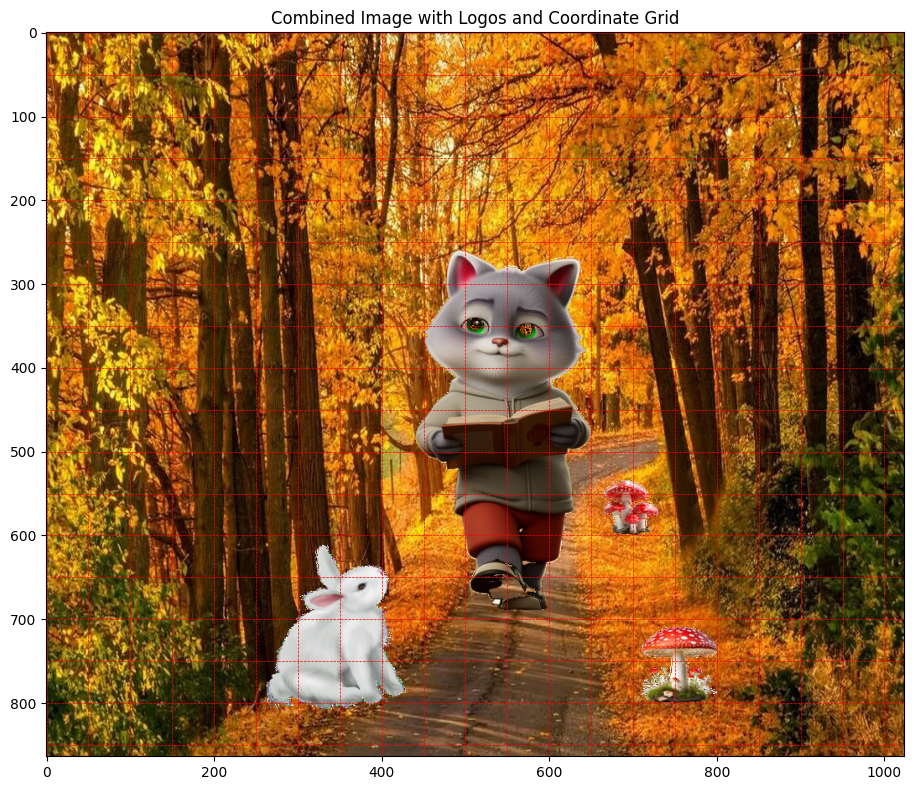

In [7]:
# Create a test logo and add it to the logos_info list
#pipeline.create_test_logo()
pipeline.logos_info = [
    {
        #'filename': r"tests\objects\sbercat_book.png", # local
        'filename': "tests/objects/sbercat_book.png",
        'sizes': (210, 430),
        'point': (650, 690),
        'alpha': 1
    },

    {
        #'filename': r"tests\objects\pngtree_red_1.png", # local
        'filename': "tests/objects/pngtree_red_1.png",
        'sizes': (90, 90),
        'point': (800, 800),
        'alpha': 1
    },

    {
        #'filename': r"tests\objects\pngtree_red_2.png", # local
        'filename': "tests/objects/pngtree_red_2.png",
        'sizes': (65, 65),
        'point': (730, 600),
        'alpha': 1
    },

    {
        #'filename': r"tests\objects\pngtree_red_2.png", # local
        'filename': "tests/objects/papik_1.png",
        'sizes': (170, 200),
        'point': (430, 810),
        'alpha': 1
    }

    ]

# Create a layered image object
layered_image = pipeline.overlay_multiple_logos()

# Save the combined image to a file
pipeline.save_combined_image(layered_image)

# Сохранение объекта после его создания
#file_name = r'results\layered_image_object.pkl' # local
file_name = 'results/layered_image_object.pkl'
save_path = project_root / Path(file_name)

layered_image.save(save_path)


# Visualize the combined image with a grid
combined_image = layered_image.render()
pipeline.visualize_with_grid(combined_image)



In [3]:
from depth_maker.dm_v1.utils import download_model
# URL модели на Hugging Face
type_encoder = 'vitl'
model_url = f"https://huggingface.co/depth-anything/Depth-Anything-V2-Large/resolve/main/depth_anything_v2_{type_encoder}.pth?download=true"
# Локальный путь для сохранения модели
checkpoint_path = project_root / "checkpoints" / "Depth_Anything_V2" / "depth_anything_v2_vitl.pth"
# Загрузка модели
download_model(model_url, str(checkpoint_path))


/content/Depth_Maker/checkpoints/Depth_Anything_V2/depth_anything_v2_vitl.pth:   0%|          | 0.00/1.25G [00…

In [8]:
from depth_maker.dm_v1.constructor_layered_image import LayeredImageObject
from depth_maker.dm_v1.stylized_layered_masks import StylizedLayeredImageObject

file_name = r'layered_image_object.pkl'
file_path = project_root / 'results' / file_name
# Load the LayeredImageObject
loaded_layered_image = LayeredImageObject.load(str(file_path))


ModuleNotFoundError: No module named 'models'

In [ ]:
from depth_maker.dm_v1.constructor_layered_image import LayeredImageObject
from depth_maker.dm_v1.stylized_layered_masks import StylizedLayeredImageObject
import cv2


file_name = r'results\layered_image_object.pkl'
save_path = project_root / Path(file_name)
# Load the LayeredImageObject
loaded_layered_image = LayeredImageObject.load(save_path)

# Локальный путь для сохранения модели
checkpoint_path = project_root / "checkpoints" / "Depth_Anything_V2" / "depth_anything_v2_vitl.pth"

# Ensure background and logos are in BGR format
if loaded_layered_image.background.shape[2] == 3:
    loaded_layered_image.background = cv2.cvtColor(loaded_layered_image.background, cv2.COLOR_RGB2BGR)

for logo in loaded_layered_image.logos:
    if logo['image'].shape[2] == 3:
        logo['image'] = cv2.cvtColor(logo['image'], cv2.COLOR_RGB2BGR)

# Background processing parameters
background_params = {
    'method': 'depth_anth',
    'brightness': 10,
    'contrast': 0.3,
    # Add more parameters if needed
}

# Logos processing parameters with rotation and canny/lineart
logos_params = [
    {
        'method': 'depth_anth',
        'brightness': 10,
        'contrast': 0.9,
        'rotation_angle': 0  # No rotation
    },

    {
        'method': 'depth_anth',
        'brightness': 10,
        'contrast': 0.9,
        'rotation_angle': 0  # No rotation
    },

    {
        'method': 'depth_anth',
        'brightness': 10,
        'contrast': 0.9,
        'rotation_angle': 0  # No rotation
    },


    {
        'method': 'depth_anth',
        'brightness': 10,
        'contrast': 0.9,
        'rotation_angle': 0  # No rotation
    },

    {
        'method': 'lineart',
        'gaussian_sigma': 5.0,
        'intensity_threshold': 30,
        'brightness': 30,
        'contrast': 0.9,
        'rotation_angle': 0  # Rotate this logo by -10 degrees
    },
    {
        'method': 'canny',
        'low_threshold': 50,
        'high_threshold': 150,
        'brightness': 30,
        'contrast': 1.2,
        'rotation_angle': 5 # Rotate this logo by -10 degrees
    }
]

# Final processing parameters (optional)
final_processing_params = {
    'method': 'threshold',
    'threshold_value': 128
}

# Initialize StylizedLayeredImageObject with depth model
stylized_layered_image = StylizedLayeredImageObject(
    loaded_layered_image,
    background_params=background_params,
    logos_params=logos_params,
    #final_processing_params=final_processing_params,  # Uncomment if needed
    depth_model_checkpoint=checkpoint_path,  # Path to your depth model checkpoint
    depth_encoder='vitl'  # Specify the encoder type used in your model
)